### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Practical activity: Sentiment analysis using Python

You are part of a data analytics team at a global company, FutureProof. The company’s product line includes a range of innovative solutions to enhance cybersecurity. The marketing manager is considering using ChatGPT to generate content, with the aim of enhancing the brand’s social media presence on YouTube and other social media platforms. The campaign will require the creation of engaging social media content, scheduled updates to social media channels, and moderating and responding to comments.  However, the CEO has reservations both about using ChatGPT, and YouTube. You have been asked to research the sentiment towards ChatGPT on YouTube. You will start by getting comments about ChatGPT straight from YouTube. To achieve this, you will need to use the YouTube API key that you created through your Google Cloud account..

In this activity, you’ll pre-process and perform sentiment analysis on the extracted comments. You’ll work with the NLTK Vader class to classify words into positive, neutral, or negative. The comments will then be assigned a sentiment estimate. Therefore, you will:

- access the API in Python and query YouTube for key phrases
- customise the query and join results from the query in a Pandas DataFrame
- apply some pre-processing and perform sentiment analysis
- use the polarity score function and identify related words
- visualise the output to present to the business to help them decide on whether to use ChatGPT.


##  1. Prepare your workstation

In [ ]:
# If needed, install the libraries.
# !pip install google-api-python-client

In [1]:
# Import the necessary libraries
import googleapiclient.discovery
import os
import json
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

# Locate and read the key from your .env file.
API_key = os.getenv('YouTube_API_key')


## 2. Retrieve comments from the defined video

In [5]:
# Create an api call
youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=API_key)

# Make the search request
comment_response = youtube.commentThreads().list(
    part='snippet,replies',
    maxResults=100,
    videoId='40Kp_fa8vIw'
).execute()

# Get the comments
comments = comment_response['items']

# Print the comments
for comment in comments:
    print(comment['snippet']['topLevelComment']['snippet']['textDisplay'])

<a href="https://youtu.be/ytCvV9xjRSk">https://youtu.be/ytCvV9xjRSk</a> -   Top 10 Free Powerful AI Tools 😮🔥🤝2023
I really do get it at the moment as it is just like google but is not updated with new information as often and it gives you information without having to click on the website but that means that you don&#39;t get to look at as much information. It would be good if it could have its own opinion but at the moment the things it says is heavily based on what&#39;s already on the internet
I love it, it makes my job easier. I found a new friend😂❤❤❤
I recently applied for YT monetization but rejected, it says my channel has monetization policy violations, problem with YT is, they don&#39;t give you specific details or where did you specifically went wrong. I&#39;m thinking now can I ask Chat GPT what are my specific violations? what videos, video metadatas that I can edit/delete? and how should I do it?
Many thanks dear really interesting and useful ...
AI is dangerous.
Going to 

## 3. Create a DataFrame

In [7]:
import pandas as pd

# Create a list of comments
comments = []

# Iterate over the comments and add them to the list
for comment in comment_response['items']: 
        comments.append(comment['snippet']['topLevelComment']
                        ['snippet']['textDisplay'])

# Create a DataFrame
df = pd.DataFrame({'Comment': comments})

# Print the DataFrame
print(df.head())

# View shape of output
df.shape

                                             Comment
0  <a href="https://youtu.be/ytCvV9xjRSk">https:/...
1  I really do get it at the moment as it is just...
2  I love it, it makes my job easier. I found a n...
3  I recently applied for YT monetization but rej...
4  Many thanks dear really interesting and useful...


(100, 1)

In [10]:
# Determine values of output.
df1 = df['Comment'].values

# View results.
print(df1)

['<a href="https://youtu.be/ytCvV9xjRSk">https://youtu.be/ytCvV9xjRSk</a> -   Top 10 Free Powerful AI Tools 😮🔥🤝2023'
 'I really do get it at the moment as it is just like google but is not updated with new information as often and it gives you information without having to click on the website but that means that you don&#39;t get to look at as much information. It would be good if it could have its own opinion but at the moment the things it says is heavily based on what&#39;s already on the internet'
 'I love it, it makes my job easier. I found a new friend😂❤❤❤'
 'I recently applied for YT monetization but rejected, it says my channel has monetization policy violations, problem with YT is, they don&#39;t give you specific details or where did you specifically went wrong. I&#39;m thinking now can I ask Chat GPT what are my specific violations? what videos, video metadatas that I can edit/delete? and how should I do it?'
 'Many thanks dear really interesting and useful ...' 'AI is dang

## 4. Pre-processing comments

In [12]:
# Import nltk and the required resources.
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

#Create a variable to store the stopwords.
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Giles\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Giles\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [16]:
# The results will change every time the code is executed. Let's review the first 15.

# Print the first 15 comments without stop words
for i in range(15):
    print(i)
    print(df1[i])

0
<a href="https://youtu.be/ytCvV9xjRSk">https://youtu.be/ytCvV9xjRSk</a> -   Top 10 Free Powerful AI Tools 😮🔥🤝2023
1
I really do get it at the moment as it is just like google but is not updated with new information as often and it gives you information without having to click on the website but that means that you don&#39;t get to look at as much information. It would be good if it could have its own opinion but at the moment the things it says is heavily based on what&#39;s already on the internet
2
I love it, it makes my job easier. I found a new friend😂❤❤❤
3
I recently applied for YT monetization but rejected, it says my channel has monetization policy violations, problem with YT is, they don&#39;t give you specific details or where did you specifically went wrong. I&#39;m thinking now can I ask Chat GPT what are my specific violations? what videos, video metadatas that I can edit/delete? and how should I do it?
4
Many thanks dear really interesting and useful ...
5
AI is dangerou

In [17]:
# Look at one comment
# Based on the results of the previous cell, select a comment in English that contains keywords suitable for text analysis

# Set the index of the comment to be returned
tid = 2
df1[tid]

'I love it, it makes my job easier. I found a new friend😂❤❤❤'

In [22]:
# Split up each comment into individual words
df2 = [word_tokenize(_) for _ in df1]

# View results.
print(df2)

[['<', 'a', 'href=', "''", 'https', ':', '//youtu.be/ytCvV9xjRSk', "''", '>', 'https', ':', '//youtu.be/ytCvV9xjRSk', '<', '/a', '>', '-', 'Top', '10', 'Free', 'Powerful', 'AI', 'Tools', '😮🔥🤝2023'], ['I', 'really', 'do', 'get', 'it', 'at', 'the', 'moment', 'as', 'it', 'is', 'just', 'like', 'google', 'but', 'is', 'not', 'updated', 'with', 'new', 'information', 'as', 'often', 'and', 'it', 'gives', 'you', 'information', 'without', 'having', 'to', 'click', 'on', 'the', 'website', 'but', 'that', 'means', 'that', 'you', 'don', '&', '#', '39', ';', 't', 'get', 'to', 'look', 'at', 'as', 'much', 'information', '.', 'It', 'would', 'be', 'good', 'if', 'it', 'could', 'have', 'its', 'own', 'opinion', 'but', 'at', 'the', 'moment', 'the', 'things', 'it', 'says', 'is', 'heavily', 'based', 'on', 'what', '&', '#', '39', ';', 's', 'already', 'on', 'the', 'internet'], ['I', 'love', 'it', ',', 'it', 'makes', 'my', 'job', 'easier', '.', 'I', 'found', 'a', 'new', 'friend😂❤❤❤'], ['I', 'recently', 'applied', '

In [23]:
# Get a list of all english words so we can exclude anything that doesn't appear on the list.
english_words = set(words.words())

# View results.
english_words

{'illiberal',
 'Lampyridae',
 'woodenheadedness',
 'misreform',
 'leper',
 'tragacanth',
 'nuptials',
 'Cristina',
 'indescribable',
 'remodel',
 'pneumococcal',
 'subincandescent',
 'oceanity',
 'congeree',
 'unweight',
 'Sandemanian',
 'parallelepipedon',
 'Alnus',
 'crawdad',
 'fallway',
 'scooping',
 'uncrippled',
 'affray',
 'ultrapapist',
 'ilima',
 'unmagnetical',
 'Adolphus',
 'unadvancedness',
 'niggerish',
 'levance',
 'Triadenum',
 'vicarious',
 'airfield',
 'Bukat',
 'swarve',
 'assertor',
 'brambly',
 'prandial',
 'towy',
 'reinability',
 'benefactor',
 'distrouser',
 'unifocal',
 'dentata',
 'jestingstock',
 'unblamably',
 'pyloralgia',
 'redivorce',
 'stannary',
 'Rees',
 'upcarry',
 'inswing',
 'misrender',
 'pockety',
 'buncher',
 'fumarole',
 'tutrix',
 'Karel',
 'fackings',
 'Turcification',
 'periculant',
 'selling',
 'cheven',
 'unuprightly',
 'preaxially',
 'suggestum',
 'unmotionable',
 'digoneutic',
 'dendroid',
 'footbridge',
 'segmental',
 'vernalize',
 'sorro

In [25]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words, but is not a stopword.

df3 = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in english_words] for x in df2]

In [26]:
# Let's have a look at the same comment as above
df3[tid]

['love', 'job', 'easier', 'found', 'new']

## 5. Perform sentiment analysis

In [27]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Giles\AppData\Roaming\nltk_data...


True

In [28]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

In [29]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3}

In [34]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
print(polarity.head())

                                                      neg    neu    pos  \
top free powerful ai                                0.000  0.112  0.888   
really get moment like new information often in...  0.000  0.779  0.221   
love job easier found new                           0.000  0.300  0.700   
recently applied monetization channel monetizat...  0.279  0.721  0.000   
many thanks dear really interesting useful          0.000  0.146  0.854   

                                                    compound  
top free powerful ai                                  0.7845  
really get moment like new information often in...    0.6872  
love job easier found new                             0.7906  
recently applied monetization channel monetizat...   -0.7003  
many thanks dear really interesting useful            0.8927  


In [37]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 5 most positive cleaned 
polarity.sort_values('pos', ascending=0).head(5)

,neg,neu,pos,compound
love,0.0,0.000,1.000,0.6369
like advanced,0.0,0.000,1.000,0.5423
like,0.0,0.000,1.000,0.3612
impressive,0.0,0.000,1.000,0.5106
top free powerful ai,0.0,0.112,0.888,0.7845


In [39]:
# Get the top 5 most negative words related to ChatGPT
polarity.sort_values('neg', ascending=0).head(5)

,neg,neu,pos,compound
crazy,1.000,0.000,0.0,-0.3400
dumb,1.000,0.000,0.0,-0.5106
ai dangerous,0.756,0.244,0.0,-0.4767
chat destroy us,0.636,0.364,0.0,-0.5423
dumb ai must bias people,0.610,0.390,0.0,-0.5719


In [40]:
# The describe function on the compound will show the distribution and moments. 

polarity['compound'].describe()

count    100.000000
mean       0.190083
std        0.471272
min       -0.890500
25%        0.000000
50%        0.213950
75%        0.571900
max        0.975300
Name: compound, dtype: float64

## 6. Visualise the output

<AxesSubplot:>

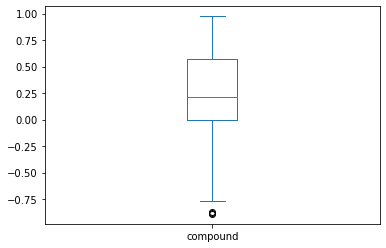

In [56]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0
# There are less negative values than positive but the negative values are highly negative.

%matplotlib inline
import matplotlib.pyplot as plt

# Create a boxplot. This is a good way to see how many values sit on the edges as outliers.
ax = polarity.reset_index()['compound'].sort_values()
ax.plot(kind='box')

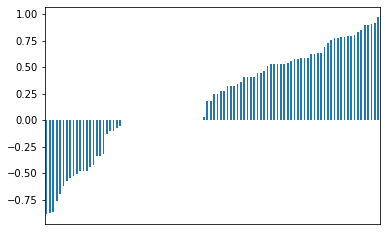

In [48]:
# Create a barplot.
ax1 = plt.axes()
plot.plot(kind='bar')

# Remove x axis labels
ax1.set_xticklabels([])
ax1.set_xticks([])

# View the barplot
plt.show()

<AxesSubplot:ylabel='Frequency'>

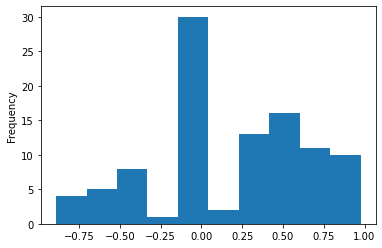

In [51]:
# You can also create a histogram:
ax2= plt.axes()
plot.plot(kind='hist')

## 7. Summarise findings

Type a summary of the analysis.

The polairty results indicate the distribution of sentiment scores within the dataset using sentiment analysis.

Count: The analysis was performed on 100 comments.

Mean: the mean sentiment score in the dataset was 0.19, meaning on average out of the 100 the sentiment is slightly skewed towards positive.

Std: the standard deviation of the 100 sentiment scores is  0.47. 0.47 is a relatively high standard deviation for a sentiment score, suggesting a large sentiment variance in sentiment between the comments/commenters.
Min: Out of the 100 comments analysed, the one with the lowest sentiment score is -0.89.

Max: Out of the 100 comments analysed, the one with the highest score was 0.975300.

25%: The first quartile is at 0, suggesting that only 25% of the comments are completely neutral or negative.

50%: The second quartile is at 0.213. Half of the comments are more positive than this and half are less. 

75%: The third quartile at is 0.571900, meaning that 25% of comments are above this threshold, meaning that around 25% of comments have a highly positive sentiment.


Conclusion:

Overall most commenters have a neutral to mildly positive outlook on ChatGPT, with only 25% having a very positive view, and only 25% having a completley neutral or negative view.